## Polynomial Terms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [2]:
insurance_df = pd.read_csv('Data/insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [4]:
from sklearn.model_selection import train_test_split

insurance_df['smoker_flag'] = np.where(insurance_df['smoker'] == 'yes', 1, 0)
insurance_df['age_sq'] = insurance_df['age'] **2
insurance_df['age_3']  = insurance_df['age'] **3
insurance_df['age_4']  = insurance_df['age'] **4

features = [
    "age",
    "age_sq",
    #"age_3",
    #"age_4",
    "bmi",
    "children",
    "smoker_flag"
]

X = sm.add_constant(insurance_df[features])
y = insurance_df["charges"]

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [5]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae

kf = KFold(n_splits=5, shuffle=True, random_state=2023)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    #Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]

    # Fit the model on fold's training data
    model = sm.OLS(y_train, X_train).fit()

    # Append Validation score to list
    cv_lm_r2s.append(r2(y_val, model.predict(X_val),))
    cv_lm_mae.append(mae(y_val, model.predict(X_val),))

print("All Validation R2s: ", [round(x,3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

All Validation R2s:  [0.739, 0.756, 0.756, 0.775, 0.716]
Cross Val R2s: 0.748 +- 0.02
All Validation MAEs:  [4352.476, 3921.623, 4365.72, 3881.476, 4363.935]
Cross Val MAEs: 4177.046 +- 225.346


## Combining Features

In [6]:
insurance_df.corr(numeric_only=True)

,age,bmi,children,charges,smoker_flag,age_sq,age_3,age_4
age,1.000000,0.109272,0.042469,0.299008,-0.025019,0.988380,0.959865,0.923337
bmi,0.109272,1.000000,0.012759,0.198341,0.003750,0.112804,0.113443,0.112234
children,0.042469,0.012759,1.000000,0.067998,0.007673,-0.003259,-0.041494,-0.070827
charges,0.299008,0.198341,0.067998,1.000000,0.787251,0.300772,0.297167,0.290581
smoker_flag,-0.025019,0.003750,0.007673,0.787251,1.000000,-0.026120,-0.025790,-0.024248
age_sq,0.988380,0.112804,-0.003259,0.300772,-0.026120,1.000000,0.991134,0.969947
age_3,0.959865,0.113443,-0.041494,0.297167,-0.025790,0.991134,1.000000,0.993540
age_4,0.923337,0.112234,-0.070827,0.290581,-0.024248,0.969947,0.993540,1.000000


In [7]:
from sklearn.model_selection import train_test_split

insurance_df = insurance_df.assign(
    smoker_flag = np.where(insurance_df["smoker"] == 'yes', 1, 0),
    age_sq = insurance_df["age"] **2,
    age_bmi_sum = insurance_df["age"] + insurance_df["bmi"]
)

features = [
    #"age",
    #"age_sq",
    #"bmi",
    "children",
    "smoker_flag",
    "age_bmi_sum"
]

X = sm.add_constant(insurance_df[features])
y = insurance_df["charges"]

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae

kf = KFold(n_splits=5, shuffle=True, random_state=2023)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    #Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]

    # Fit the model on fold's training data
    model = sm.OLS(y_train, X_train).fit()

    # Append Validation score to list
    cv_lm_r2s.append(r2(y_val, model.predict(X_val),))
    cv_lm_mae.append(mae(y_val, model.predict(X_val),))

print("All Validation R2s: ", [round(x,3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

All Validation R2s:  [0.737, 0.751, 0.755, 0.771, 0.713]
Cross Val R2s: 0.746 +- 0.02
All Validation MAEs:  [4262.086, 3934.033, 4373.104, 3863.039, 4358.212]
Cross Val MAEs: 4158.095 +- 216.496


## Interaction Terms

In [9]:
insurance_df = pd.read_csv('Data/insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
insurance_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


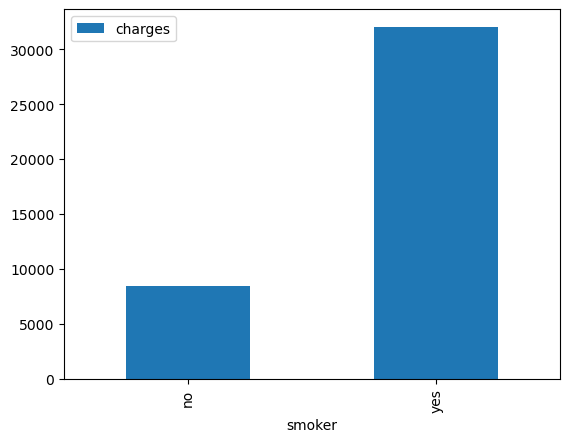

In [11]:
insurance_df.groupby('smoker').agg({'charges':'mean'}).plot.bar();

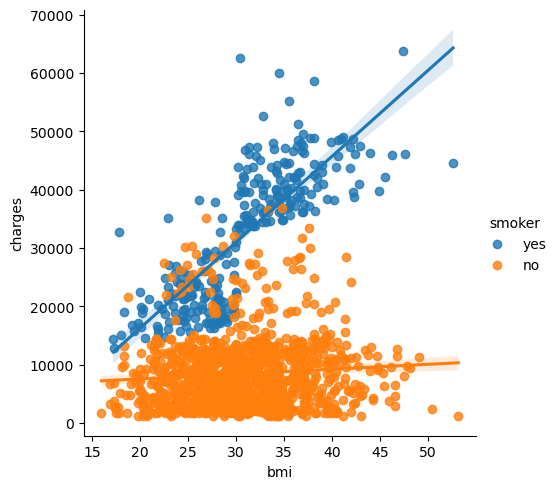

In [12]:
sns.lmplot(insurance_df, x='bmi', y='charges', hue='smoker');

In [13]:
from sklearn.model_selection import train_test_split

insurance_df = insurance_df.assign(
    smoker_flag = np.where(insurance_df["smoker"] == 'yes', 1, 0),
    age_sq = insurance_df["age"] **2,
    smoker_bmi_int = lambda x: x['smoker_flag'] * x['bmi']
)

features = [
    "age",
    "age_sq",
    "bmi",
    "children",
    "smoker_flag",
    "smoker_bmi_int"
]

X = sm.add_constant(insurance_df[features])
y = insurance_df["charges"]

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae

kf = KFold(n_splits=5, shuffle=True, random_state=2023)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    #Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]

    # Fit the model on fold's training data
    model = sm.OLS(y_train, X_train).fit()

    # Append Validation score to list
    cv_lm_r2s.append(r2(y_val, model.predict(X_val),))
    cv_lm_mae.append(mae(y_val, model.predict(X_val),))

print("All Validation R2s: ", [round(x,3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

All Validation R2s:  [0.827, 0.846, 0.841, 0.879, 0.807]
Cross Val R2s: 0.84 +- 0.024
All Validation MAEs:  [3029.062, 2816.531, 2863.643, 2571.345, 3190.368]
Cross Val MAEs: 2894.19 +- 208.377


## Dummy Variables

In [15]:
insurance_df = pd.read_csv('Data/insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


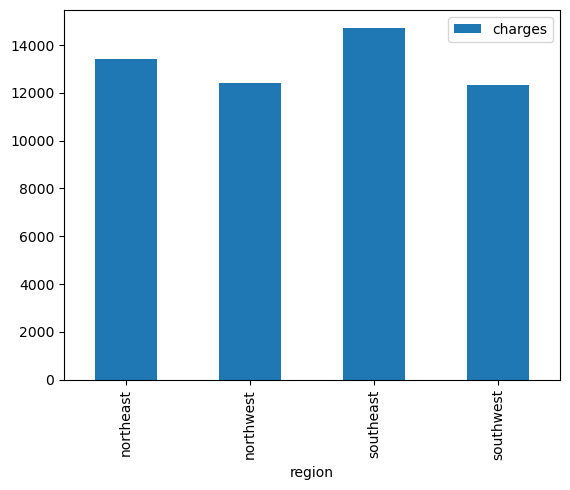

In [16]:
insurance_df.groupby('region').agg({'charges':'mean'}).plot.bar();

In [17]:
insurance_df = pd.get_dummies(insurance_df, drop_first=True).astype(int)
insurance_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [18]:
from sklearn.model_selection import train_test_split

'''
insurance_df = insurance_df.assign(
    smoker_flag = np.where(insurance_df["smoker"] == 'yes', 1, 0),
    age_sq = insurance_df["age"] **2,
    smoker_bmi_int = lambda x: x['smoker_flag'] * x['bmi']
)
'''

insurance_df = (
    pd.get_dummies(insurance_df, drop_first=True)
    .assign(age_sq = insurance_df['age']**2)
)

'''
features = [
    "age",
    "age_sq",
    "bmi",
    "children",
    "smoker_flag",
    "smoker_bmi_int"
]
'''

X = sm.add_constant(insurance_df.drop('charges', axis=1))
y = insurance_df["charges"]

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae

kf = KFold(n_splits=5, shuffle=True, random_state=2023)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    #Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]

    # Fit the model on fold's training data
    model = sm.OLS(y_train, X_train).fit()

    # Append Validation score to list
    cv_lm_r2s.append(r2(y_val, model.predict(X_val),))
    cv_lm_mae.append(mae(y_val, model.predict(X_val),))

print("All Validation R2s: ", [round(x,3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

All Validation R2s:  [0.739, 0.753, 0.758, 0.777, 0.718]
Cross Val R2s: 0.749 +- 0.02
All Validation MAEs:  [4305.957, 4009.053, 4349.093, 3870.542, 4367.516]
Cross Val MAEs: 4180.432 +- 202.29


In [20]:
model = sm.OLS(y, X).fit()

print(f"Test R2: {r2(y_test, model.predict(X_test))}")
print(f"Test MAE: {mae(y_test, model.predict(X_test))}")

Test R2: 0.7597452001853398
Test MAE: 4003.2014459197585


In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     356.7
Date:                Wed, 08 Oct 2025   Prob (F-statistic):          1.98e-313
Time:                        21:02:40   Log-Likelihood:                -10846.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1060   BIC:                         2.176e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6749.7895   1915.547     -3.524      0.000   -1.05e+04   -2991.095
age                -48.3213     92.830     -0.521      0.603    -230.472     133.830
bmi                331.6245     31.967     10.374      0.000     268.898     394.351
children           615.1229    165.301      3.721      0.000     290.769     939.477
sex_male            -1.5168    377.377     -0.004      0.997    -742.008     738.974
smoker_yes        2.407e+04    470.018     51.220      0.000    2.32e+04     2.5e+04
region_northwest   194.9936    544.691      0.358      0.720    -873.802    1263.790
region_southeast  -965.8271    535.921     -1.802      0.072   -2017.414      85.759
region_southwest  -948.3372    538.888     -1.760      0.079   -2005.746     109.072
age_sq               3.9068      1.157      3.377      0.001       1.637       6.177
==============================================================================
Omnibus:                      259.827   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              661.586
Skew:                           1.269   Prob(JB):                    2.18e-144
Kurtosis:                       5.897   Cond. No.                     2.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Binning Categorical Data

In [22]:
insurance_df = pd.read_csv('Data/insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
def value_counter(dataframe):
    value_series = pd.DataFrame()
    for col in dataframe.select_dtypes(['object']).columns:
        print(dataframe[col].value_counts())

value_counter(insurance_df)

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


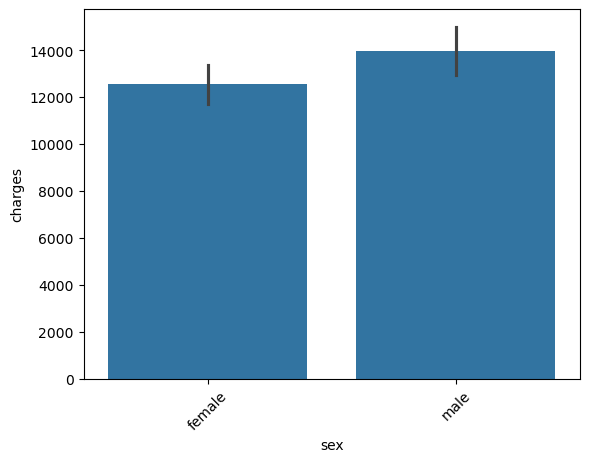

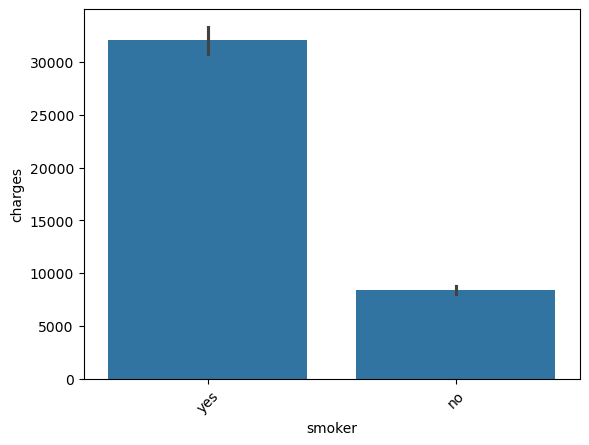

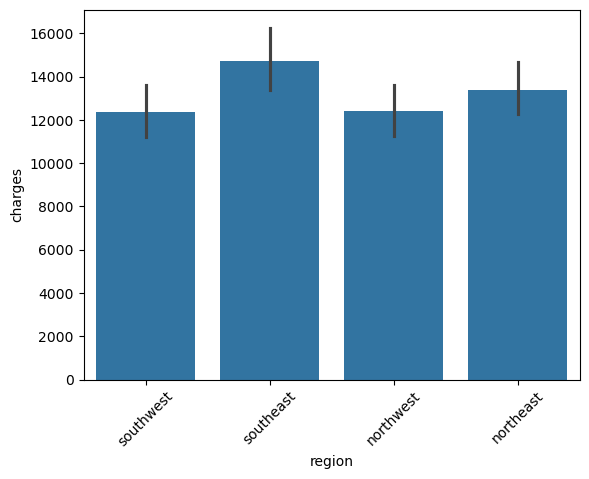

In [24]:
def cat_plotter(data, target):
    import matplotlib.pyplot as plt
    for col in data.select_dtypes(['object']).columns:
        sns.barplot(data=data, x=col, y=target)
        plt.xticks(rotation=45)
        plt.show()

cat_plotter(insurance_df, 'charges')

In [25]:
region_dict = {
    'northwest': 'west',
    'southwest': 'west',
    'northeast': 'east',
    'southeast': 'east',
}

insurance_df['region_group'] = insurance_df['region'].map(region_dict)
insurance_df['region_group'].value_counts()

region_group
east    688
west    650
Name: count, dtype: int64

In [26]:
# Binning Numeric Data
insurance_df['has_child'] = np.where(insurance_df['children'] > 0, 1, 0)
insurance_df['has_child'].value_counts()

has_child
1    764
0    574
Name: count, dtype: int64

In [27]:
insurance_df = insurance_df.drop(['region', 'sex', 'children'], axis=1)
insurance_df.head()

,age,bmi,smoker,charges,region_group,has_child
0,19,27.900,yes,16884.92400,west,0
1,18,33.770,no,1725.55230,east,1
2,28,33.000,no,4449.46200,east,1
3,33,22.705,no,21984.47061,west,0
4,32,28.880,no,3866.85520,west,0


In [28]:
from sklearn.model_selection import train_test_split

insurance_df = (
    pd.get_dummies(insurance_df, drop_first=True).astype(int)
    .assign(
        age_sq = insurance_df['age']**2,
        smoker_bmi_int = lambda x: x['smoker_yes'] * x['bmi']
    )
)

X = sm.add_constant(insurance_df.drop(['charges'], axis=1))
y = insurance_df["charges"]

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

X.head()

,const,age,bmi,has_child,smoker_yes,region_group_west,age_sq,smoker_bmi_int
1068,1.0,63,21,1,0,1,3969,0
1018,1.0,54,35,1,0,1,2916,0
995,1.0,39,23,1,0,0,1521,0
1248,1.0,18,39,0,0,0,324,0
549,1.0,43,46,0,1,0,1849,46


In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae

kf = KFold(n_splits=5, shuffle=True, random_state=2023)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    #Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]

    # Fit the model on fold's training data
    model = sm.OLS(y_train, X_train).fit()

    # Append Validation score to list
    cv_lm_r2s.append(r2(y_val, model.predict(X_val),))
    cv_lm_mae.append(mae(y_val, model.predict(X_val),))

print("All Validation R2s: ", [round(x,3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

All Validation R2s:  [0.826, 0.841, 0.843, 0.874, 0.808]
Cross Val R2s: 0.838 +- 0.022
All Validation MAEs:  [2993.541, 2841.406, 2872.67, 2609.23, 3239.023]
Cross Val MAEs: 2911.174 +- 205.81


In [30]:
model = sm.OLS(y, X).fit()

print(f"Test R2: {r2(y_test, model.predict(X_test))}")
print(f"Test MAE: {mae(y_test, model.predict(X_test))}")

Test R2: 0.8436135563969476
Test MAE: 2865.988600475334


In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     795.9
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:02:40   Log-Likelihood:                -10611.
No. Observations:                1070   AIC:                         2.124e+04
Df Residuals:                    1062   BIC:                         2.128e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2875.2179   1596.020      1.801      0.072    -256.494    6006.929
age                 -57.4594     77.073     -0.746      0.456    -208.693      93.774
bmi                  -8.6622     27.982     -0.310      0.757     -63.568      46.243
has_child          1500.2726    330.460      4.540      0.000     851.845    2148.700
smoker_yes        -1.984e+04   1828.974    -10.849      0.000   -2.34e+04   -1.63e+04
region_group_west     5.2523    304.451      0.017      0.986    -592.142     602.647
age_sq                4.1165      0.961      4.284      0.000       2.231       6.002
smoker_bmi_int     1448.0693     59.094     24.504      0.000    1332.114    1564.024
==============================================================================
Omnibus:                      592.910   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3823.519
Skew:                           2.571   Prob(JB):                         0.00
Kurtosis:                      10.702   Cond. No.                     2.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""